<a href="https://colab.research.google.com/github/AndreyRos/Test/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Clustering%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
#Локальное подключение Google Диска

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to retrieve api_key

def get_data(path):
    with open(path) as f:
        return pd.read_csv(path, sep=';',index_col='NUM777')

In [ ]:
data = get_data("/content/drive/My Drive/Ex1.csv", )

In [ ]:
#data['NUM777'] = data['NUM777'] / 777
data['APP_R'] = data['APP_R'].str.replace(',', '.')
data['AVG'] = data['AVG'].str.replace(',', '.')

data['APP_R'] = pd.to_numeric(data['APP_R'])
data['AVG'] = pd.to_numeric(data['AVG'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 527505300 to 291595668
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Count        307 non-null    int64  
 1   Count_Error  307 non-null    int64  
 2   APP_R        307 non-null    float64
 3   AVG          307 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 12.0 KB


In [ ]:
data.head(5)

,Count,Count_Error,APP_R,AVG
NUM777,,,,
527505300,39,0,0.71,25.48
550593855,31,0,0.64,29.30
293904135,29,0,0.69,39.67
901878663,37,0,0.69,22.53
1325663010,12,0,0.88,17.51


In [ ]:
#data.iloc[:,2:4].sort_values(by=[' "Age"'])
x = data.loc[:,['Count_Error', 'APP_R', 'AVG']]
col1 = 'Count_Error'
col2 = 'APP_R'
col3 = 'AVG'

#2

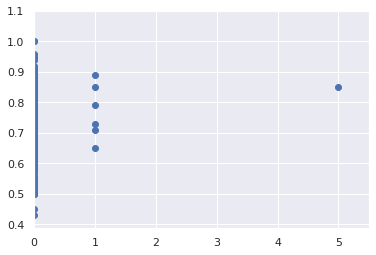

In [ ]:
plt.scatter(data[col1],data[col2])
plt.xlim(data[col1].min()*0.9, data[col1].max()*1.1)
plt.ylim(data[col2].min()*0.9, data[col2].max()*1.1)
plt.show()

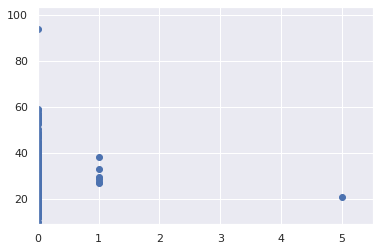

In [ ]:
plt.scatter(data[col1],data[col3])
plt.xlim(data[col1].min()*0.9, data[col1].max()*1.1)
plt.ylim(data[col3].min()*0.9, data[col3].max()*1.1)
plt.show()

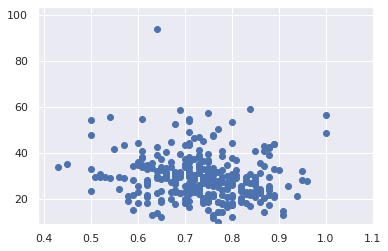

In [ ]:
plt.scatter(data[col2],data[col3])
plt.xlim(data[col2].min()*0.9, data[col2].max()*1.1)
plt.ylim(data[col3].min()*0.9, data[col3].max()*1.1)
plt.show()

Text(0, 0.5, 'WCSS')

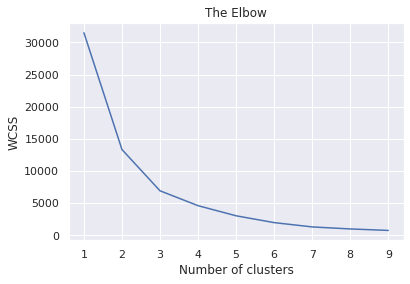

In [ ]:
wcss=[]
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       2, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1,

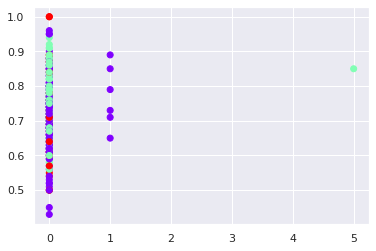

In [ ]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters[col1],data_with_clusters[col2],c=data_with_clusters['Clusters'],cmap='rainbow')

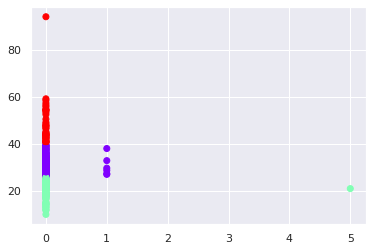

In [ ]:
plt.scatter(data_with_clusters[col1], data_with_clusters[col3],c=data_with_clusters['Clusters'],cmap='rainbow')

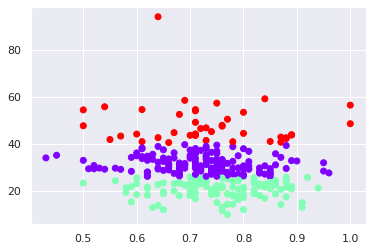

In [ ]:
plt.scatter(data_with_clusters[col2], data_with_clusters[col3],c=data_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
data_with_clusters

,Count,Count_Error,APP_R,AVG,Clusters
NUM777,,,,,
527505300,39,0,0.71,25.48,1
550593855,31,0,0.64,29.30,0
293904135,29,0,0.69,39.67,0
901878663,37,0,0.69,22.53,1
1325663010,12,0,0.88,17.51,1
...,...,...,...,...,...
301412286,4,0,0.84,21.66,1
1227741585,13,0,0.62,28.05,0
292483779,19,0,0.75,18.63,1


#3

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score

In [ ]:
#K-Means works with Numeric Data
selected_cols = [' "Age"', ]